# A graph of Globular Clusters in a Plate Carrée projection

In [2]:
#Set up astropy and astroquery 
from astropy.table import Table,Column
from astropy.coordinates import SkyCoord, Distance
from astropy.io.votable import from_table, writeto
from astropy import units as u
from astroquery.vizier import Vizier
v = Vizier()
v.ROW_LIMIT = -1
#setup matplotlib
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Download a catalog of Globular Clusters
Properties of Galactic Globular Clusters<a hhref="http://cdsads.u-strasbg.fr/cgi-bin/nph-bib_query?2014MNRAS.441.1105F&db_key=AST&nosetcookie=1">((Francis+, 2014))</a><br>
VizieR Catalog: <a href="http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=VII/271/catalog&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa">VII/271/catalog</a><br>
157 Objects

In [4]:
Cats = v.get_catalogs('VII/271/catalog')
GCCat=Cats[0]
GCCat.rename_column('__Fe_H_', 'Fe/H')
GCCat.rename_column('_RAJ2000', 'RA')
GCCat.rename_column('_DEJ2000', 'dec')
distCol=Column(1000*GCCat['Dist'].filled(0),name='distance',meta={'ucd': 'pos.distance'}, unit='pc')
GCCat.add_column(distCol)
del GCCat['Dist']
GCCoords=SkyCoord(GCCat['RA'],GCCat['dec'],unit=(u.degree, u.degree),\
                   distance=Distance(GCCat['distance'],u.pc),frame='icrs')

In [5]:
GCCat

RA,dec,ID,Name,RAJ2000,DEJ2000,mu0,r_Dist,e_Dist,o_Dist,DistH,X,Y,Z,Rgc,E_B-V_,Fe/H,e__Fe_H_,r__Fe_H_,RV,r_RV,e_RV,o_RV,n_RV,SimbadName,distance
deg,deg,,,deg,deg,mag,,kpc,,kpc,kpc,kpc,kpc,kpc,mag,[Sun],[Sun],,km / s,,km / s,,,,pc
float64,float64,bytes15,bytes25,float64,float64,float32,bytes1,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,bytes4,float32,bytes1,float32,int16,bytes2,bytes26,float32
6.0234,-72.0813,NGC 104,47 Tucanae,6.0234,-72.0813,13.31,*,0.04,13,4.5,1.9,-2.6,-3.2,6.9,0.04,-0.69,0.06,S12,-17.0,*,0.2,9,ti,NGC 104,4580.00
13.1885,-26.5826,NGC 288,,13.1885,-26.5826,14.86,*,0.19,4,8.9,-0.1,0.0,-9.4,12.0,0.03,-1.35,0.04,S12,-45.2,*,0.4,7,ti,NGC 288,9360.00
15.8094,-70.8488,NGC 362,Melotte 4,15.8094,-70.8488,14.73,*,0.13,6,8.6,3.2,-5.2,-6.4,9.2,0.05,-1.31,0.05,S12,222.9,*,1.5,4,ti,NGC 362,8840.00
30.7375,-3.2528,Whiting 1,Whiting 1,30.7375,-3.2528,17.34,*,1.90,1,30.1,-13.7,4.5,-25.6,33.5,0.03,-0.70,--,H10,-130.6,*,1.8,1,t,Name Whiting 1,29400.00
48.0675,-55.2162,NGC 1261,,48.0675,-55.2162,16.09,*,0.37,4,16.3,0.1,-10.2,-13.1,18.1,0.01,-1.28,0.06,S12,63.7,*,12.1,2,ti,NGC 1261,16540.00
53.3335,79.5811,Pal 1,Palomar 1,53.3335,79.5811,15.56,*,0.59,2,11.1,-7.9,9.4,4.2,18.4,0.15,-0.65,0.09,H10,-82.8,*,3.3,1,t,Pal 1,12970.00
58.7600,-49.6067,AM 1,E 1,58.7600,-49.6067,20.45,*,12.32,1,123.3,-16.5,-80.0,-92.2,124.4,0.00,-1.70,0.09,H10,116.0,*,20.0,1,t,AM 1,123200.00
66.1863,-21.1900,Eridanus,Eridanus star cluster,66.1863,-21.1900,19.77,*,3.72,2,90.1,-53.0,-41.6,-59.3,94.3,0.02,-1.47,0.12,S12,-21.0,*,4.0,1,t,Name Eridanus star cluster,89760.00


### Make Plot with a Plate Carrée projection

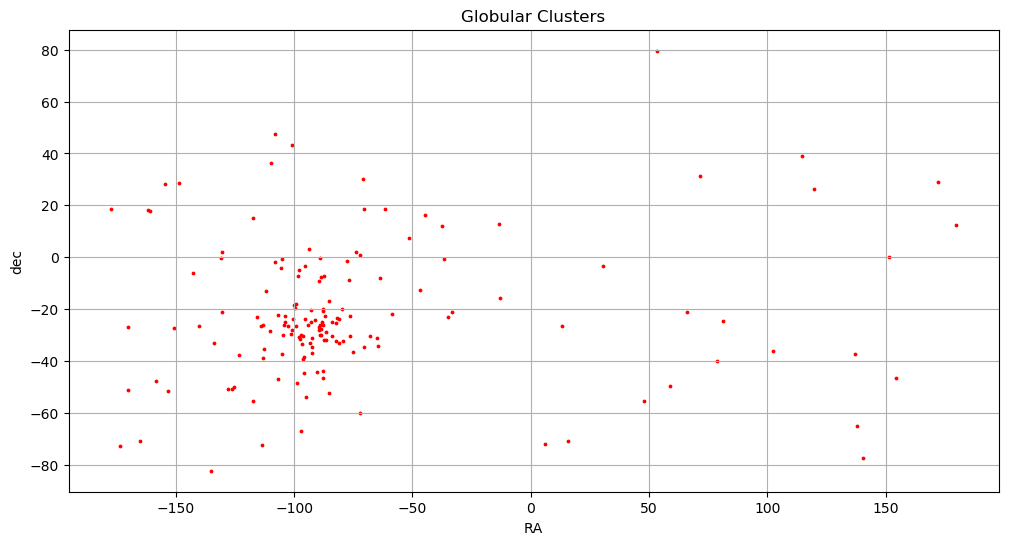

In [13]:
fig = plt.figure (figsize=(12,6))
ax = fig.add_subplot(111)
ax.grid(True)
ax.set_title("Globular Clusters")
ax.set_xlabel("RA")
ax.set_ylabel("dec")
ax.scatter(GCCoords.ra.wrap_at(180.*u.degree),GCCoords.dec,c='red',s=3)

In [14]:
#save plot
fig.savefig('GlobularClusters.png')